In [ ]:
import pandas as pd
import datetime

In [ ]:
full_df = pd.read_csv("/content/drive/MyDrive/data.csv", encoding = "unicode_escape")

In [ ]:
full_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df = full_df
r_df = df

In [ ]:
# Recency block
r_df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
r_df['new_date'] = df['InvoiceDate']+pd.DateOffset(years= 10)
r_df = df[df['CustomerID'].notnull()]
r_df['CustomerID'] = r_df['CustomerID'].astype('int')
r_df['Start_Date'] = datetime.datetime.now()
r_df['Date_diff'] = r_df['Start_Date'] - r_df['new_date']
r_df['Date_diff_text'] = r_df['Date_diff'].astype('str')
r_df['days'] = r_df['Date_diff_text'].str.split('days').str[0]
r_df['days'] = r_df['days'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
df_recency = r_df.groupby(by='CustomerID',as_index=False)['days'].min()
df_recency['Rank'] = df_recency['days'].rank(method='dense')
df_recency['Rank'] = df_recency['Rank'].astype('int')

In [ ]:
def rank_bucket(x):
  if 0 <= x < 65:
    return 5
  elif 65 <= x < 130:
    return 4
  elif 130 <= x < 195:
    return 3
  elif 195 <= x < 260:
    return 2
  else:
    return 1

In [ ]:
df_recency['R_score'] = df_recency["Rank"].apply(rank_bucket)

In [ ]:
df_recency

,CustomerID,days,Rank,R_score
0,12346,682,273,1
1,12347,359,3,5
2,12348,432,66,4
3,12349,375,17,5
4,12350,667,260,1
...,...,...,...,...
4367,18280,634,232,2
4368,18281,537,155,3
4369,18282,364,7,5
4370,18283,360,4,5


In [ ]:
# Frequency block
df_frequency = df.groupby(by = ['CustomerID'], as_index=False)['InvoiceNo'].nunique()
df_frequency.columns = ['CustomerID','Frequency']
df_frequency.sort_values('Frequency',ascending=False)

,CustomerID,Frequency
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118
...,...,...
1141,13877.0,1
2997,16400.0,1
1142,13878.0,1
1149,13886.0,1


In [ ]:
df_frequency['Rank'] = df_frequency['Frequency'].rank(method='dense',ascending=False)
df_frequency['Rank'] = df_frequency['Rank'].astype('int')

In [ ]:
def freq_bucket(x):
  if 0 <= x < 13:
    return 5
  elif 13 <= x < 26:
    return 4
  elif 26 <= x < 39:
    return 3
  elif 39 <= x < 52:
    return 2
  else:
    return 1

In [ ]:
df_frequency['F_score'] = df_frequency["Rank"].apply(freq_bucket)

In [ ]:
df_frequency

,CustomerID,Frequency,Rank,F_score
0,12346.0,2,64,1
1,12347.0,7,59,1
2,12348.0,4,62,1
3,12349.0,1,65,1
4,12350.0,1,65,1
...,...,...,...,...
4367,18280.0,1,65,1
4368,18281.0,1,65,1
4369,18282.0,3,63,1
4370,18283.0,16,50,2


In [ ]:
df['Total_Price'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Monetary block
df_monetary = df.groupby(by=['CustomerID'], as_index=False)['Total_Price'].sum()
df_monetary.columns = ['CustomerID','Total_Price']

In [ ]:
df_monetary

,CustomerID,Total_Price
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [ ]:
df_monetary['Frequency'] = df_frequency['Frequency']

In [ ]:
df_monetary

,CustomerID,Total_Price,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,7
2,12348.0,1797.24,4
3,12349.0,1757.55,1
4,12350.0,334.40,1
...,...,...,...
4367,18280.0,180.60,1
4368,18281.0,80.82,1
4369,18282.0,176.60,3
4370,18283.0,2094.88,16


In [ ]:
df[df['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,new_date,Total_Price
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2021-01-18 10:01:00,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2021-01-18 10:17:00,-77183.6


In [ ]:
df_monetary['Avg_monetary_value'] = df_monetary['Total_Price'] / df_monetary['Frequency']

In [ ]:
df_monetary

,CustomerID,Total_Price,Frequency,Avg_monetary_value
0,12346.0,0.00,2,0.000000
1,12347.0,4310.00,7,615.714286
2,12348.0,1797.24,4,449.310000
3,12349.0,1757.55,1,1757.550000
4,12350.0,334.40,1,334.400000
...,...,...,...,...
4367,18280.0,180.60,1,180.600000
4368,18281.0,80.82,1,80.820000
4369,18282.0,176.60,3,58.866667
4370,18283.0,2094.88,16,130.930000


In [ ]:
df_monetary['Rank'] = df_monetary['Avg_monetary_value'].rank(method='dense',ascending=False)
df_monetary['Rank'] = df_monetary['Rank'].astype('int')

In [ ]:
df_monetary

,CustomerID,Total_Price,Frequency,Avg_monetary_value,Rank
0,12346.0,0.00,2,0.000000,4255
1,12347.0,4310.00,7,615.714286,380
2,12348.0,1797.24,4,449.310000,735
3,12349.0,1757.55,1,1757.550000,38
4,12350.0,334.40,1,334.400000,1334
...,...,...,...,...,...
4367,18280.0,180.60,1,180.600000,2862
4368,18281.0,80.82,1,80.820000,4024
4369,18282.0,176.60,3,58.866667,4141
4370,18283.0,2094.88,16,130.930000,3545


In [ ]:
df_monetary.sort_values('Rank')

,CustomerID,Total_Price,Frequency,Avg_monetary_value,Rank
10,12357.0,6207.67,1,6207.670000,1
2522,15749.0,21535.90,4,5383.975000,2
282,12688.0,4873.81,1,4873.810000,3
55,12415.0,123725.45,26,4758.671154,4
333,12752.0,4366.78,1,4366.780000,5
...,...,...,...,...,...
619,13154.0,-611.86,1,-611.860000,4293
125,12503.0,-1126.00,1,-1126.000000,4294
1384,14213.0,-1192.20,1,-1192.200000,4295
2236,15369.0,-1592.49,1,-1592.490000,4296


In [ ]:
df_monetary['Avg_monetary_value'].max(), df_monetary['Avg_monetary_value'].min()

(6207.67, -4287.63)

In [ ]:
# 860, 1720, 2580, 3440, 4300
def mon_bucket(x):
  if 0 <= x < 860:
    return 5
  elif 860 <= x < 1720:
    return 4
  elif 1720 <= x < 2580:
    return 3
  elif 2580 <= x < 3440:
    return 2
  else:
    return 1

In [ ]:
df_monetary['M_score'] = df_monetary['Rank'].apply(mon_bucket)

In [ ]:
df_monetary

,CustomerID,Total_Price,Frequency,Avg_monetary_value,Rank,M_score
0,12346.0,0.00,2,0.000000,4255,1
1,12347.0,4310.00,7,615.714286,380,5
2,12348.0,1797.24,4,449.310000,735,5
3,12349.0,1757.55,1,1757.550000,38,5
4,12350.0,334.40,1,334.400000,1334,4
...,...,...,...,...,...,...
4367,18280.0,180.60,1,180.600000,2862,2
4368,18281.0,80.82,1,80.820000,4024,1
4369,18282.0,176.60,3,58.866667,4141,1
4370,18283.0,2094.88,16,130.930000,3545,1


In [ ]:
# Customer_ID, R_score, F_score, M_score
df_rfm = pd.DataFrame()

In [ ]:
df_rfm['Customer_ID'] = df_recency['CustomerID']
df_rfm['R_score'] = df_recency['R_score']
df_rfm['F_score'] = df_frequency['F_score']
df_rfm['M_score'] = df_monetary['M_score']

In [ ]:
df_rfm

,Customer_ID,R_score,F_score,M_score
0,12346,1,1,1
1,12347,5,1,5
2,12348,4,1,5
3,12349,5,1,5
4,12350,1,1,4
...,...,...,...,...
4367,18280,2,1,2
4368,18281,3,1,1
4369,18282,5,1,1
4370,18283,5,2,1


In [ ]:
df_rfm['Avg_score'] = (df_rfm['R_score'] + df_rfm['F_score'] + df_rfm['M_score'])/3

In [ ]:
df_rfm

,Customer_ID,R_score,F_score,M_score,Avg_score
0,12346,1,1,1,1.000000
1,12347,5,1,5,3.666667
2,12348,4,1,5,3.333333
3,12349,5,1,5,3.666667
4,12350,1,1,4,2.000000
...,...,...,...,...,...
4367,18280,2,1,2,1.666667
4368,18281,3,1,1,1.666667
4369,18282,5,1,1,2.333333
4370,18283,5,2,1,2.666667


In [ ]:
def customer_Seg(x):
  if 4 < x <= 5:
    return "Champions"
  elif 3 < x <= 4:
    return "Potential Loyalists"
  elif 2 < x <= 3:
    return "New Customers"
  elif 1 < x <= 2:
    return "At Risk Customers"
  else:
    return "Can't Lose them"

In [ ]:
df_rfm['Customer_Segmentation'] = df_rfm['Avg_score'].apply(customer_Seg)

In [ ]:
df_rfm

,Customer_ID,R_score,F_score,M_score,Avg_score,Customer_Segmentation
0,12346,1,1,1,1.000000,Can't Lose them
1,12347,5,1,5,3.666667,Potential Loyalists
2,12348,4,1,5,3.333333,Potential Loyalists
3,12349,5,1,5,3.666667,Potential Loyalists
4,12350,1,1,4,2.000000,At Risk Customers
...,...,...,...,...,...,...
4367,18280,2,1,2,1.666667,At Risk Customers
4368,18281,3,1,1,1.666667,At Risk Customers
4369,18282,5,1,1,2.333333,New Customers
4370,18283,5,2,1,2.666667,New Customers


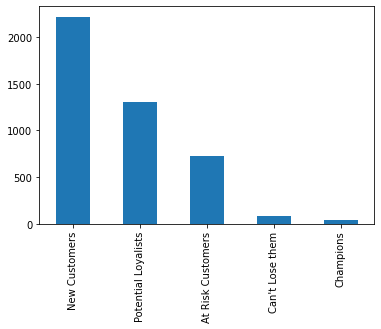

In [ ]:
df_rfm['Customer_Segmentation'].value_counts().plot(kind='bar')